# AIPI 590 - XAI | Assignment #04
### Explainable Techniques II
### Rebecca Du (rrd17)



[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rrdu/AIPI-590/blob/main/HW4/AIPI590_ExplainableTech2.ipynb)


## Overview

For this assignment, we were tasked with choosing our own dataset and model to create PDP/ ICE / ALE plots for.

The model and dataset I chose are listed below:

- **Model**: RandomForest
- **Dataset**: [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) from UCI
- **Target variable**: quality score


The steps I will take are as follows:

1. Load, Clean, EDA for Dataset
2. Create Random Forest Model
3. Visualizations:
    - 3.1) Create PDPs
    - 3.2) Create ICE Plots
    - 3.3) Create ALE Plots
4. Analysis
  - 4.1) Interesting Findings
  - 4.2) PDP vs. ALE
  - 4.3) Correlations with Quality
  - 4.4) Overall

**NO AI was used for this assignment.**

Only the demo notebooks from the XAI Github were used as reference for explainability techniques

## 1) Exploratory Data Analysis and Check Assumptions

In [ ]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-ggq0foi0/alepython_8dda29a8bc22485db34ecf50c8750263
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-ggq0foi0/alepython_8dda29a8bc22485db34ecf50c8750263
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 1.6 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350ab6-py3-none-any.whl size=15251 sha256=5d62c8887a8147224f151ab72f9a2772d2f28cf181e2a3d91a1c9291bc89b813
  Stored in directory: /tmp/pip-ephem-wheel-cache-0a114_2c/wheels/87/54/8b/9357059e0e9ade0ea889a30fe56beaed44312e07475133b2cc
Successfully built alepython


In [ ]:
#Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from alepython import ale_plot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#Load data
files.upload()
df = pd.read_csv('winequality-red.csv')

#Check data
df.head()

Saving winequality-red.csv to winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Basic checks
print("Data shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())
print("\nHead:\n", df.head())

Data shape: (1599, 12)

Dtypes:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.

In [ ]:
#Descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The data looks good - there are no missing values.

Now, let's take a closer look at the target variable: quality

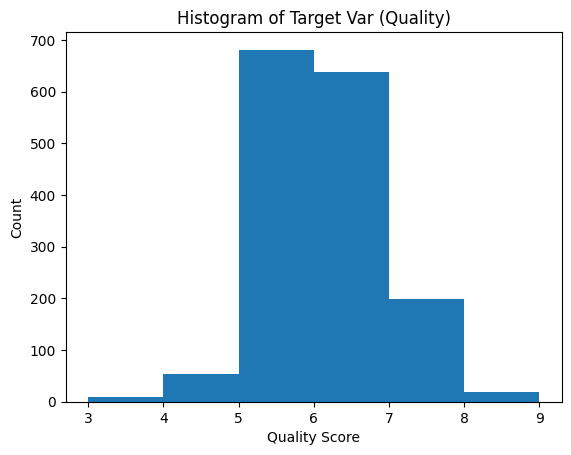

In [ ]:
#Plot histogram of quality
plt.figure()
df['quality'].plot(kind='hist', bins=range(int(df['quality'].min()), int(df['quality'].max())+2))
plt.title('Histogram of Target Var (Quality)')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

Interestingly, this dataset seems to only have wines of quality 3-8 rather than the entire typical 0-10 range.

Most of the wines seem to score about 5-7 in quality.

Next, let's see how correlated the features are with each other and the target variable.

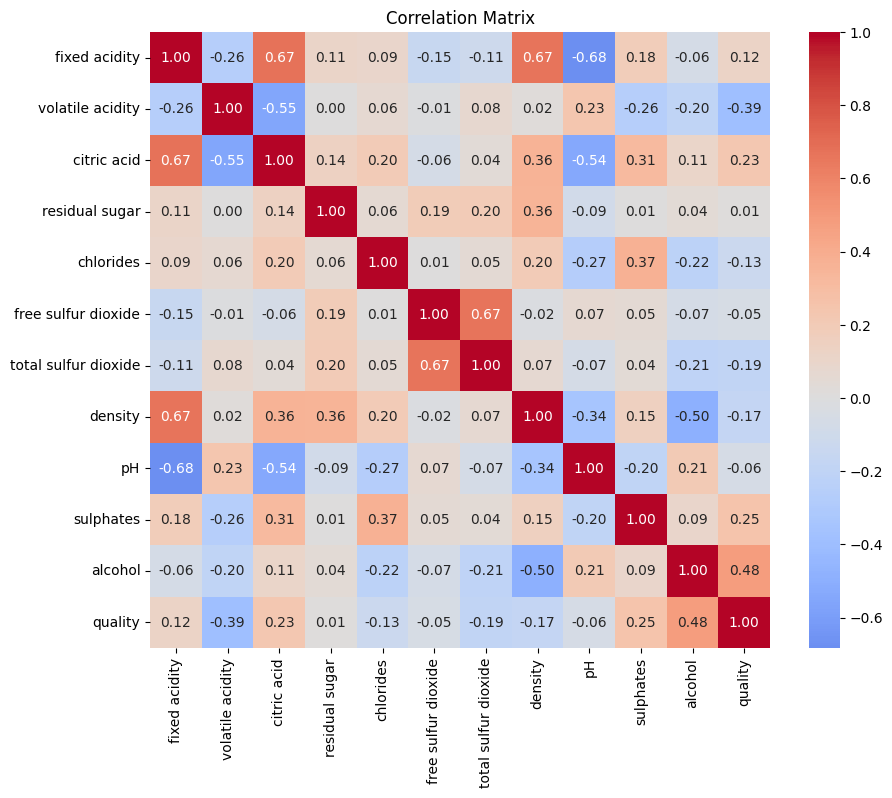

In [ ]:
#Create correlation matrix
corr = df.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Correlation with target variable
corr_with_quality = df.corr()['quality'].sort_values(ascending=False)
print(corr_with_quality)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


From the correlation matrix heatmap we can see that most of the features are not overly correlated with each other. Some correlations (e.g. fixed acidity/citric acid) are somewhat higher but this is to be expected since they are somewhat related.

However, the heatmap does not display egregious signs of multicollinearity and Random Forest is not very sensitive to correlated predictors.

From the correlation values above, we can see that the features that contribute to predicting wine quality the best are:
  - Alcohol (positive corr w/quality)
  - Volatile Acidity (negative corr w/quality)
  - Sulphates (positive corr w/quality)
  - Citric Acid (positive corr w/quality)


## 2) Create Random Forest Model

Random Forest models are a machine learning model consisting of multiple decision trees. These trees are created during training and the overall model's final output is the mean prediction of the individual trees. This makes the model more robust than a single tree.

For this assignment, we will be using Random Forest for regression to predict wine quality as a numerical score.

In [ ]:
#Set up variables
y = df['quality']
X = df.drop('quality', axis=1)
feature_names = X.columns.tolist()

In [ ]:
#Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create and train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Evaluate results of model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random Forest Performance:')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R2: {r2:.3f}')

Random Forest Performance:
RMSE: 0.549
MAE: 0.422
R2: 0.539


From these results, we can see the following:

- **RMSE = 0.549:** this indicates that on average, the Random Forest model is off by 0.55 units when predicting quality score.
- **MAE = 0.422:** this represents the average deviation between predicted values and the ground truth. Thus, our model is off by half a unit per prediction, so this means the model is fairly reliable.
- **R2 = 0.539:** this means the model explains roughly 54% of the variability in the data. This could use some improvement, as the model is not capturing all the patterns in the data.

Overall, it seems our model is decently accurate, explaining roughly half the variation in quality.

## 3) Visualizations

### 3.1) Partial Dependence Plots (PDP)

Partial Dependence Plots show the marginal effect that individual features of interest have on the predicted outcome of a model*

We will choose the 3 top features from the correlation matrix in EDA: alcohol, volatile acidity, and sulphates

*Note: description is paraphrased from the global_explanations.ipynb in the XAI Github

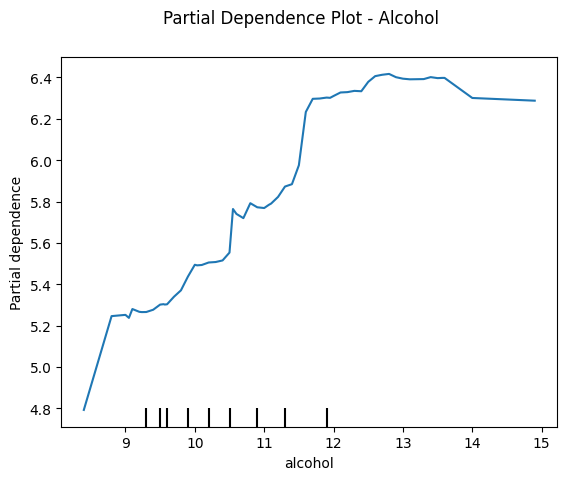

In [ ]:
#Plot alcohol
PartialDependenceDisplay.from_estimator(rf, X_train, ['alcohol'])
plt.suptitle("Partial Dependence Plot - Alcohol")
plt.show()

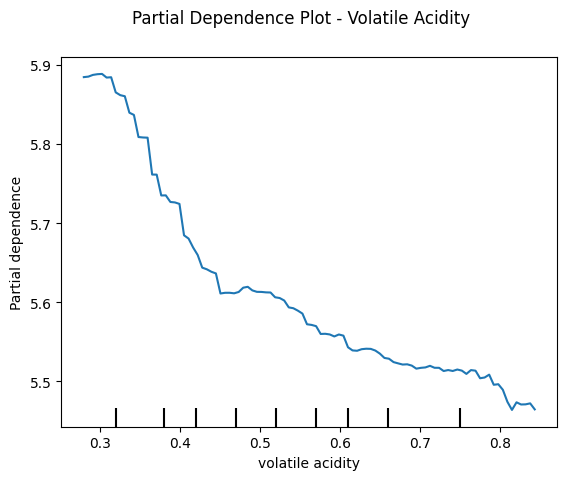

In [ ]:
#Plot Volatile Acidity
PartialDependenceDisplay.from_estimator(rf, X_train, ['volatile acidity'])
plt.suptitle("Partial Dependence Plot - Volatile Acidity")
plt.show()

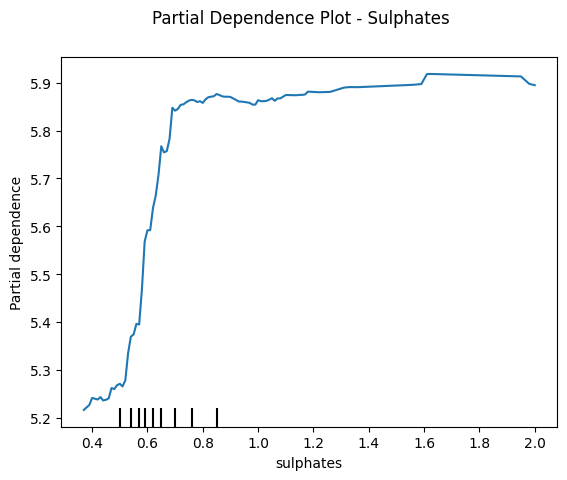

In [ ]:
#Plot Sulphates
PartialDependenceDisplay.from_estimator(rf, X_train, ['sulphates'])
plt.suptitle("Partial Dependence Plot - Sulphates")
plt.show()

From the plots we can see that:
- **Alcohol** has the strongest positive impact on quality, increasing it up to 12%
- **Volatile acidity** has the strongest negative impact on quality, demonstrated by a consistent decrease in quality as it increases.
- **Sulphates** have a moderate influence, with lower sulphate values increasing quality but higher values having less impact on quality.

These conclusions fit with the information we obtained from the correlation matrix.

### 3.2) ICE Plots

ICE plots create one line per instance and display how the instance's prediction changes when a feature is changed.*

We will make ICE plots for each of the 3 variables we just mentioned: alcohol, volatile acidity, and sulphates.

*Note: description is paraphrased from local_explanations.ipynb from XAI Github

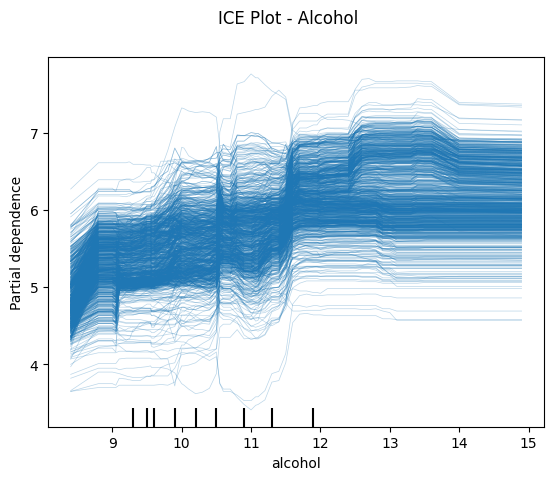

In [ ]:
#ICE plots for alcohol
PartialDependenceDisplay.from_estimator(rf, X_train, ['alcohol'], kind='individual')
plt.suptitle("ICE Plot - Alcohol")
plt.show()

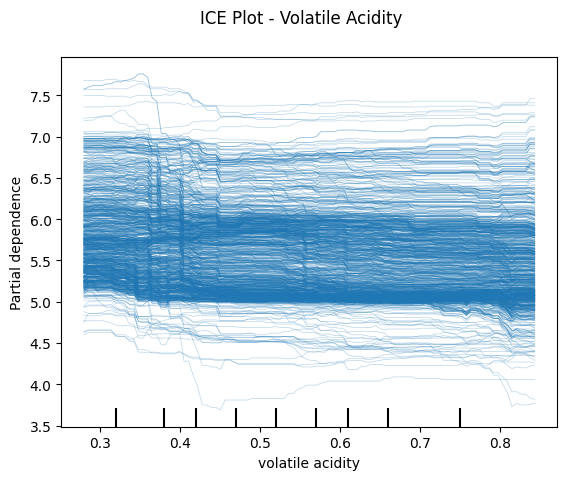

In [ ]:
#ICE Plot for Volatile Acditiy
PartialDependenceDisplay.from_estimator(rf, X_train, ['volatile acidity'], kind='individual')
plt.suptitle("ICE Plot - Volatile Acidity")
plt.show()

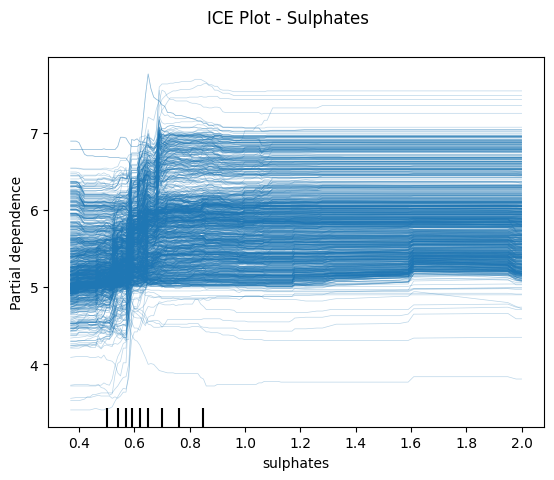

In [ ]:
#ICE Plot for Sulphates
PartialDependenceDisplay.from_estimator(rf, X_train, ['sulphates'], kind='individual')
plt.suptitle("ICE Plot - Sulphates")
plt.show()

From the graphs we can see the following:
- **Alcohol:** most of the ICE lines have a positive relationship with wine quality.
  - But, there is a good amount of variation between the lines, indicating that for some wines alcohol will have a stronger impact than others.
- **Volatile Acidity:** most of the ICE lines have a slight downward trend, corroborating with what the PDP and correlation matrix told us.
  - The lines are mostly parallel, indicating that volatile acidity has pretty much the same effect across all wines: more of it means lower wine quality.
- **Sulphates:** the ICE lines have a general upward trend before stabilizing.
  - However, we can see that there are a few lines indicating some wines did benefit from having higher amounts of sulphates.
  - For the most part, there is a limit up to which sulphates improve the wine quality and any more past that will compromise the quality.

### 3.3) ALE Plots

ALE plots are similar to PDP in that they also examine how a feature influences model predictions. However, they focus on local differences in predictions as the feature's value is changed. These local effects are aggregated to show overall influence.

We will continue to use the same 3 features: alcohol, volatile acidity, and sulphates.

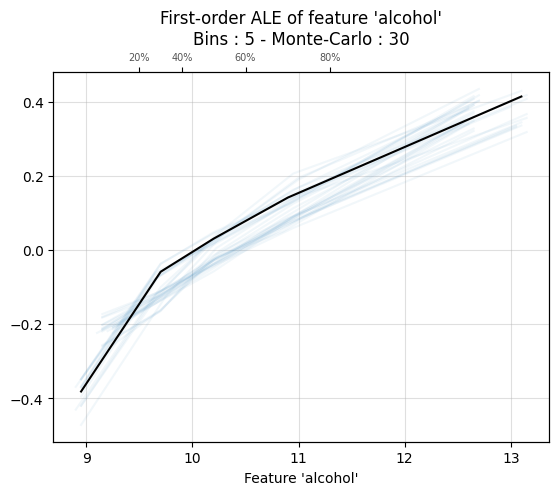

<Axes: title={'center': "First-order ALE of feature 'alcohol'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'alcohol'">

In [ ]:
#ALE Plots - Alcohol
ale_plot(
    rf,
    X_train,
    "alcohol",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

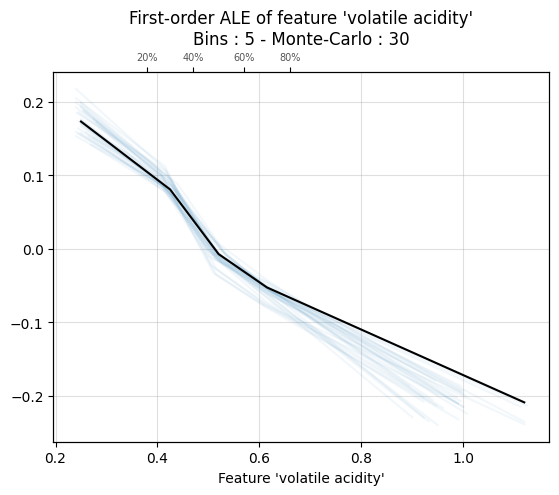

<Axes: title={'center': "First-order ALE of feature 'volatile acidity'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'volatile acidity'">

In [ ]:
#ALE Plots - Volatile Acidity
ale_plot(
    rf,
    X_train,
    "volatile acidity",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

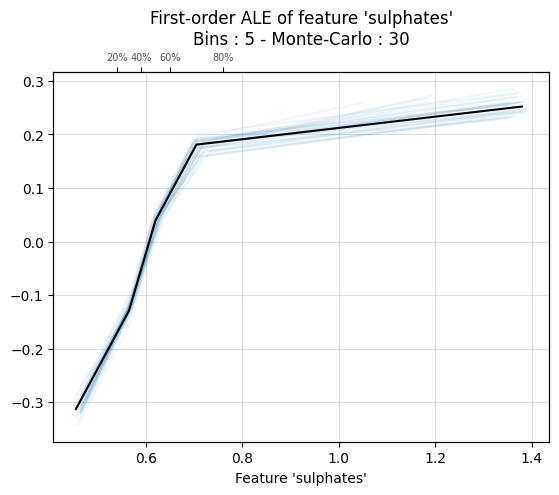

<Axes: title={'center': "First-order ALE of feature 'sulphates'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'sulphates'">

In [ ]:
#ALE Plots - Sulphates
ale_plot(
    rf,
    X_train,
    "sulphates",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

From the graphs we can see the following:
- **Alcohol:** there are strongly increasing ALE values as the alcohol value increases.
  - The ALE plots confirm that alcohol is a robust and positive predictor of quality.
- **Volatile Acidity:** there is a noticeable negative slope.
  - This confirms what the previous plots told us: as volatile acidity increases, prediced quality decreases steadily.
- **Sulphates:** there is a sharp increase from 0.5 to 0.8 but then it flattens out.
  - Again, this is similar to trends we have seen in previous plots: sulphates improve wine quality up to a certain amount.
  - After that point, the marginal effect is small.

## 4) Analysis



### 4.1) Interesting Findings

The findings across all the plots were relatively consistent. Of the 3 principal featuers that were investigated, alcohol had a strong positive relationship with the target variable (quality), volatile acidity had a negative impact on quality, and sulphates had a positive impact up to a certain point.

Some findings that were interesting were in the ICE plots. There, a distinction was apparent: for a few individual wines, the impact of the features on quality was more pronounced than others.

### 4.2) PDP vs. ALE

We will investigate the differences between PDP and ALE for each of the 3 features of interest:

- **Alcohol:**
  - The PDP plot for alcohol had an almost parabolic and nonlinear shape that demonstrated plateauing at higher values of alcohol.
  - However, the ALE plot is more linear in appearance.
  - This can be explained by PDP's assumption that alcohol is independent of other features, when in reality, the correlation matrix has demonstrated alcohol has correlations with density and fixed acidity.
  - ALE accounts for this dependence and is thus able to model the impact of alcohol more accurately.

- **Volatile Acidity:**
  - The PDP plot and ALE plot for volatile acidity are very similar.
  - Thus, following the previous explanation of PDP and ALE assumptions, this means that volatile acidity does not exhibit strong correlations with other predictors.

- **Sulphates:**
  - Like with alcohol, the PDP plot is more jagged than the ALE plots for the sulphate feature.
  - Similarly, this indicates correlations with other features.

### 4.3) Correlations with Quality
- **Alcohol (0.48):** this indicates decently strong positive correlation, which is consistent with the conclusion reached by the various plots.

- **Volatile Acidity (-0.39):** this indicates moderately strong negative correlation, which is also consistent with the conclusion reached by the various plots.

- **Sulphates (0.23):** this indicates slightly weaker correlation.

It is important to assess the correlations between features bceause PDP plots assume independence. Thus, this may cause PDP plots to be distorted (e.g. failing to consider that density and alcohol have a -0.5 correlation with each other results in different PDP and ALE plots).

ALE plots apply local conditioning and thus adjust for the correlations, resulting in more objective interpretations.

Thus, features that have highly similar PDP and ALE plots (like volatile acidity) can be deemed robust.




### 4.4) Overall

In terms of the 3 features that we examined, wines that were determined to be of high quality typically had:
- High values for **alcohol**
- Low values for **volatile acidity**
- Moderate values for **sulphates**

In regards to the explainability techniques, it was determined that PDP's assumption of independence can cause misleading representations of correlated variables. ALE plots are able to correct for this, so creating both PDP and ALE plots provides more insight into a feature's robustness. ICE plots further nuance analysis by allowing visualization of unique data points that stray from the overall trend.